# CAC40
### This article will discuss about CAC40 and its components. We will analyze their correlation, their trends...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pandas_datareader.data as web
import datetime
import seaborn as sns 
from scipy import stats
from scipy.stats import norm
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
sns.set(style = "whitegrid", color_codes = True)
sns.set(font_scale = 1)
from astropy.table import Table, Column

#list of all components of CAC40
components =['SOLB','LHN.PA','NOKIA.PA','ACA.PA','ATO.PA','SAF.PA','AI.PA','CA.PA','FP.PA','OR.PA','AC.PA','EN.PA','SAN','CS.PA','BN.PA','RI.PA','MC.PA','SW.PA','ML.PA','KER.PA','UG.PA','EI.PA','SU.PA','VIE.PA','UL','SGO.PA','CAP.PA','DG.PA','VIV.PA','PUB.PA','GLE.PA','BNP.PA','RNO.PA','ORA.PA','ENGI.PA','LR.PA','FR.PA','FTI.PA','MT.PA','AIR.PA']

#index Cac40
Cac = ['^FCHI']

#Choose Close Value
ls_key = 'Close'
start = datetime.datetime(2016, 12, 1)
end = datetime.datetime(2017, 5, 4)
df_component = web.DataReader(components, 'yahoo',start,end)
DataComponent = df_component.ix[ls_key]
DataComponent.rename(columns = {'SOLB':'Solvay','LHN.PA':'LafargeHolcim','NOKIA.PA':'Nokia','ACA.PA':'Credit Agricole','ATO.PA':'Atos','SAF.PA':'Safran','AI.PA':'Air Liquide','CA.PA':'Carrefour','FP.PA':'Total','OR.PA':'Loreal','AC.PA':'Accor Hotels','EN.PA':'Bouygues','SAN':'Sanofi','CS.PA':'Axa','BN.PA':'Danone','RI.PA':'Pernod Ricard','MC.PA':'Lvmh','SW.PA':'Sodexo','ML.PA':'Michelin','KER.PA':'Kering','UG.PA':'Peugeot','EI.PA':'Essilor Intl','SU.PA':'Schneider Electric','VIE.PA':'Veolia Environ','UL':'Unibail-Rodamco','SGO.PA':'Saint Gobain','CAP.PA':'Cap Gemini','DG.PA':'Vinci','VIV.PA':'Vivendi','PUB.PA':'Publicis Groupe','GLE.PA':'Societe Generale','BNP.PA':'Bnp Paribas','RNO.PA':'Renault','ORA.PA':'Orange','ENGI.PA':'Engie','LR.PA':'Legrand SA','FR.PA':'Valeo','FTI.PA':'TechnipFMC','MT.PA':'Arcelor Mittal','AIR.PA':'Airbus'}, inplace= True)
print(DataComponent.head())

df_cac = web.DataReader(Cac, 'yahoo',start,end)
DataCac = df_cac.ix[ls_key]
DataCac.rename(columns = {'^FCHI':'CAC40', '^STOXX50E':'Euro Stoxx 50', '^VIX':'VIX', '^GSPC':'S&P 500'}, inplace= True)
print(DataCac.head())

train = pd.concat([DataComponent,DataCac], axis = 1)
print(train.shape)


            Accor Hotels  Credit Agricole  Air Liquide  Airbus   Atos  Danone  \
Date                                                                            
2016-12-01        33.205           10.750        95.97   60.05  95.70   58.50   
2016-12-02        33.075           10.600        95.31   58.99  94.98   58.39   
2016-12-05        33.540           10.855        96.32   59.88  96.47   58.61   
2016-12-06        33.790           11.275        98.18   59.40  96.45   58.75   
2016-12-07        35.035           11.380       101.00   58.58  98.28   58.90   

            Bnp Paribas  Carrefour  Cap Gemini     Axa   ...     Safran  \
Date                                                     ...              
2016-12-01        55.90     21.560       72.98  22.410   ...      65.20   
2016-12-02        54.59     21.590       72.65  22.220   ...      64.91   
2016-12-05        55.30     21.920       73.44  22.775   ...      65.48   
2016-12-06        58.15     22.035       73.58  23.440   

In [2]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing data in training test:")
print(missing_data.head(10))
print("-"*25)

#dealing with missing data
train = train.fillna(train.mean())


Missing data in training test:
                 Total   Percent
Arcelor Mittal      19  0.171171
Unibail-Rodamco      5  0.045045
Sanofi               5  0.045045
CAC40                4  0.036036
Solvay               3  0.027027
Axa                  0  0.000000
Valeo                0  0.000000
Total                0  0.000000
Engie                0  0.000000
Bouygues             0  0.000000
-------------------------


Populating the interactive namespace from numpy and matplotlib


C:\Users\Stagiaire\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['norm']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<function matplotlib.pyplot.show>

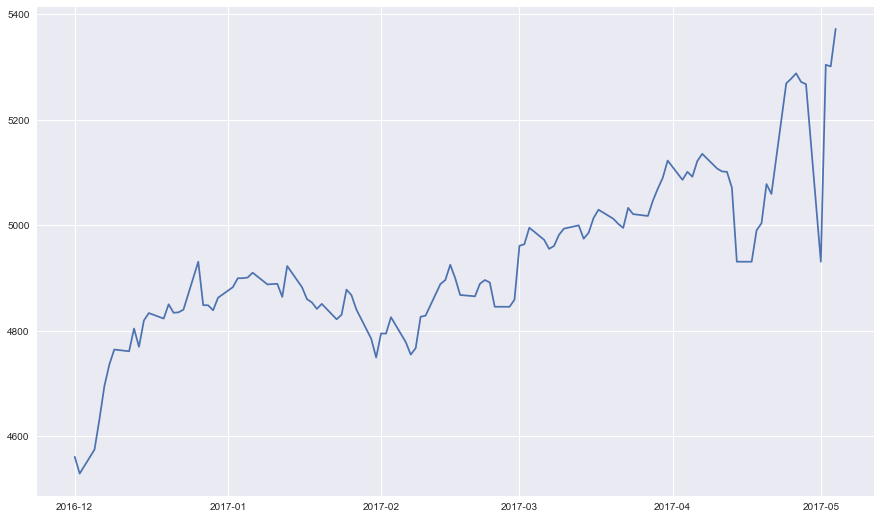

In [3]:
plt.title('CAC40')
plt.xlabel('Time')
plt.ylabel('Close Price')

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

plt.plot(train['CAC40'])
plt.grid(True)
plt.show

C:\Users\Stagiaire\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


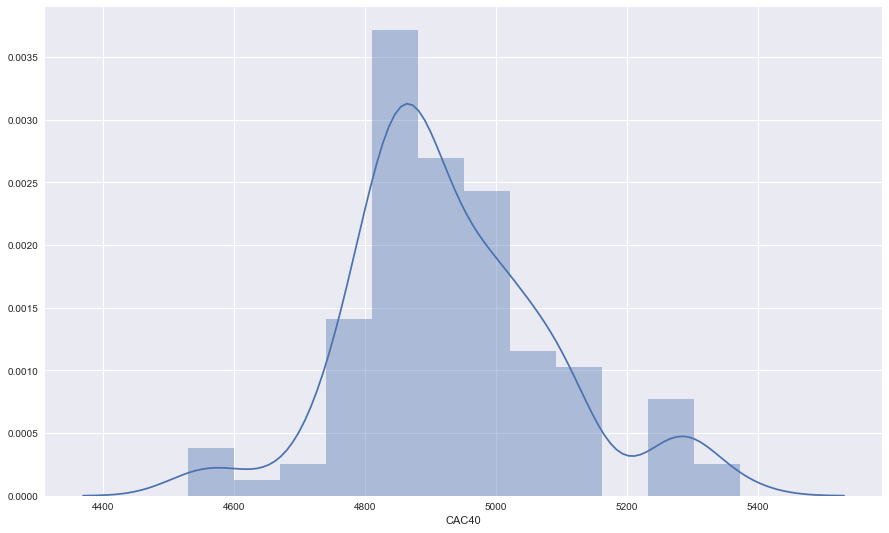

In [4]:
sns.distplot(train['CAC40'])

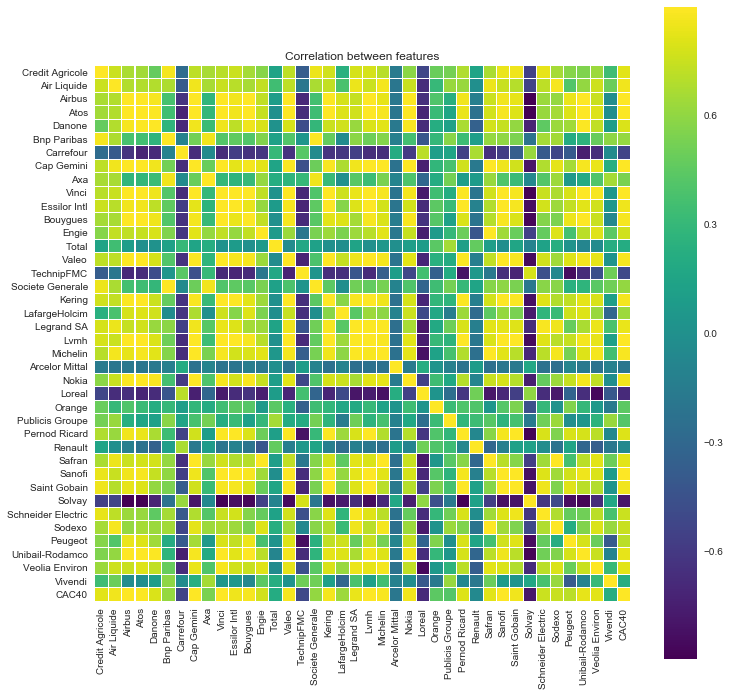

In [5]:
#Correlation between features
corrMatrix = train.select_dtypes(include = ['Float64','int64']).iloc[:,1:].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corrMatrix,vmax = .8, linewidths = 0.01, square = True, cmap = 'viridis', linecolor ='white')
plt.title('Correlation between features')


In [24]:
#Calculate correlation between variables and target
corr = train.corr()['CAC40']
print("Correlation Coefficients")
print(corr[np.argsort(corr,axis=0)[::-1]])
most_corr_component = corr[corr>0.88].index
print (list(most_corr_component))

Correlation Coefficients
CAC40                 1.000000
Cap Gemini            0.931872
Vinci                 0.910891
Lvmh                  0.901497
Sanofi                0.901020
Airbus                0.898000
Atos                  0.891111
Michelin              0.882359
Valeo                 0.875147
Bouygues              0.873450
Kering                0.866125
Saint Gobain          0.861646
Nokia                 0.859318
Air Liquide           0.859291
Essilor Intl          0.852845
Legrand SA            0.838626
Unibail-Rodamco       0.829279
Safran                0.820441
Credit Agricole       0.818691
Veolia Environ        0.814631
Pernod Ricard         0.802720
Danone                0.799501
Accor Hotels          0.789296
Engie                 0.771569
Schneider Electric    0.751708
Sodexo                0.750367
Peugeot               0.714764
LafargeHolcim         0.638000
Bnp Paribas           0.616195
Societe Generale      0.606533
Axa                   0.539913
Orange        

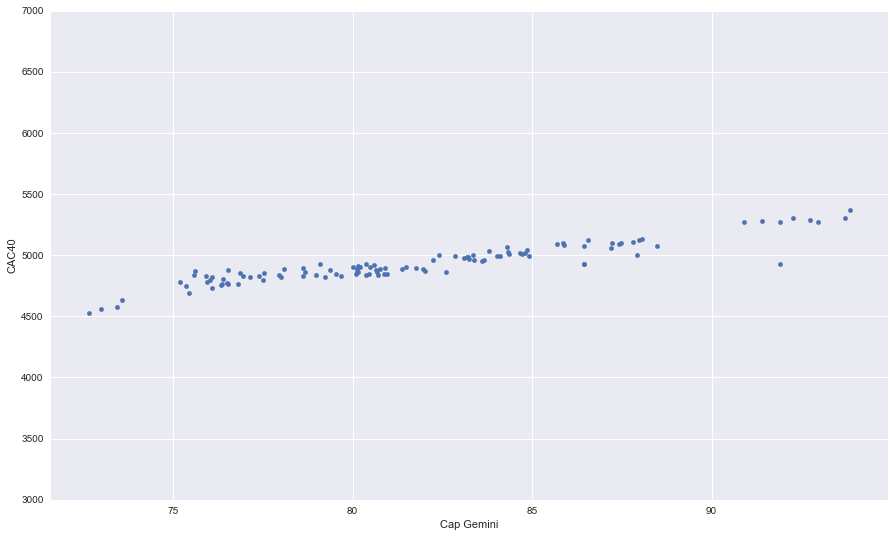

In [25]:
#scatter plot Cap Gemini/CAC40
var = 'Cap Gemini'
data_CapGemini = pd.concat([train['CAC40'], train[var]], axis=1)
data_CapGemini.plot.scatter(x=var, y='CAC40', ylim=(3000,7000));

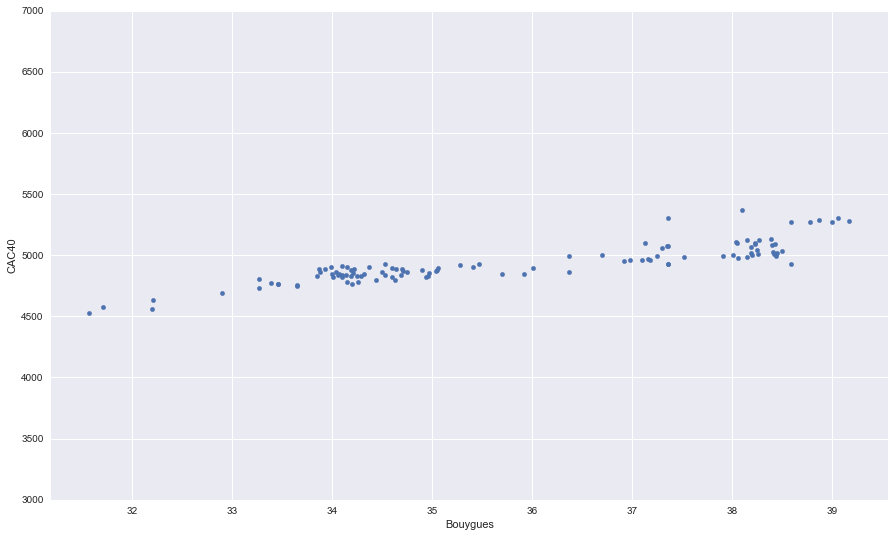

In [26]:
#scatter plot Bouygues/CAC40
var = 'Bouygues'
data_Bouygues = pd.concat([train['CAC40'], train[var]], axis=1)
data_Bouygues.plot.scatter(x=var, y='CAC40', ylim=(3000,7000));

## Stock return
One transformation would be to consider the stock's return since the beginning of the period of interest  
$$return_{t,0} = \frac{price_t}{price_0}$$

In [27]:
# df.apply(arg) will apply the function arg to each column in df, and return a DataFrame with the result
# Recall that lambda x is an anonymous function accepting parameter x; in this case, x will be a pandas Series object
stock_return = DataComponent.apply(lambda x: x / x[0])
stock_return.head()

,Accor Hotels,Credit Agricole,Air Liquide,Airbus,Atos,Danone,Bnp Paribas,Carrefour,Cap Gemini,Axa,...,Safran,Sanofi,Saint Gobain,Solvay,Schneider Electric,Sodexo,Peugeot,Unibail-Rodamco,Veolia Environ,Vivendi
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2016-12-02,0.996085,0.986047,0.993123,0.982348,0.992476,0.998120,0.976565,1.001391,0.995478,0.991522,...,0.995552,0.986900,0.988938,1.000000,0.996813,0.990253,0.990760,1.012765,0.993009,0.979433
2016-12-05,1.010089,1.009767,1.003647,0.997169,1.008046,1.001880,0.989267,1.016698,1.006303,1.016287,...,1.004294,1.017467,1.002704,1.004505,1.014181,1.002924,1.015636,1.024764,0.983159,0.981656
2016-12-06,1.017618,1.048837,1.023028,0.989176,1.007837,1.004274,1.040250,1.022032,1.008221,1.045962,...,1.013804,1.076419,1.015855,0.999099,1.021033,0.995127,1.031983,1.013275,1.005720,0.994997
2016-12-07,1.055112,1.058605,1.052412,0.975520,1.026959,1.006838,1.063685,1.036642,1.033571,1.087907,...,1.021166,1.100437,1.044248,1.000901,1.031867,1.008772,1.075693,1.017616,0.989196,0.991384


Populating the interactive namespace from numpy and matplotlib


C:\Users\Stagiaire\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['var']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


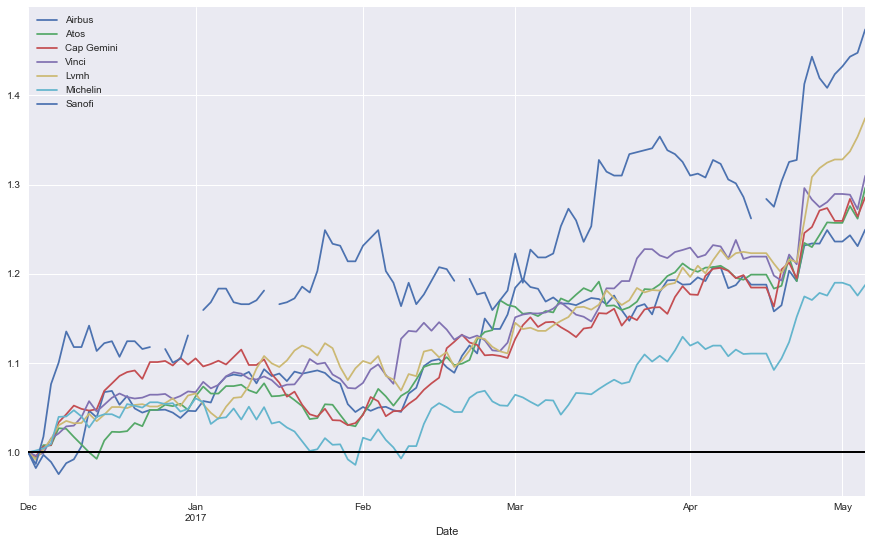

In [28]:

%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

stock_return[list(most_corr_component)[:-1]].plot(grid = True).axhline(y = 1, color = "black", lw = 2)

### Stock growth
Log differences: 
$$ change_t = log(price_t) - log(price_{t-1}) $$

In [11]:
# Let's use NumPy's log function, though math's log function would work just as well
import numpy as np

stock_change = DataComponent.apply(lambda x: np.log(x) - np.log(x.shift(1))) # shift moves dates back by 1.
stock_change.head()

,Accor Hotels,Credit Agricole,Air Liquide,Airbus,Atos,Danone,Bnp Paribas,Carrefour,Cap Gemini,Axa,...,Safran,Sanofi,Saint Gobain,Solvay,Schneider Electric,Sodexo,Peugeot,Unibail-Rodamco,Veolia Environ,Vivendi
Date,,,,,,,,,,,,,,,,,,,,,
2016-12-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-12-02,-0.003923,-0.014052,-0.006901,-0.017810,-0.007552,-0.001882,-0.023714,0.001390,-0.004532,-0.008515,...,-0.004458,-0.013187,-0.011124,0.000000,-0.003192,-0.009794,-0.009282,0.012684,-0.007015,-0.020781
2016-12-05,0.013961,0.023772,0.010541,0.014975,0.015566,0.003761,0.012922,0.015169,0.010815,0.024671,...,0.008743,0.030503,0.013824,0.004494,0.017273,0.012714,0.024798,0.011778,-0.009970,0.002268
2016-12-06,0.007426,0.037962,0.019127,-0.008048,-0.000207,0.002386,0.050253,0.005233,0.001905,0.028781,...,0.009424,0.056324,0.013031,-0.005396,0.006733,-0.007805,0.015967,-0.011274,0.022688,0.013499
2016-12-07,0.036183,0.009270,0.028318,-0.013901,0.018796,0.002550,0.022278,0.014194,0.024832,0.039319,...,0.007235,0.022067,0.027566,0.001802,0.010556,0.013619,0.041483,0.004274,-0.016566,-0.003638


Populating the interactive namespace from numpy and matplotlib


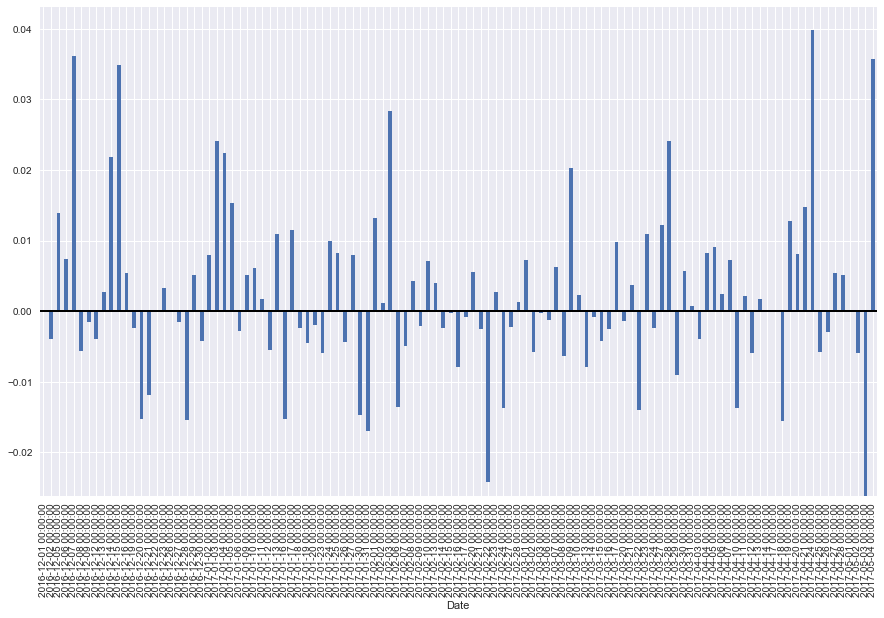

In [12]:
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots
stock_change["Accor Hotels"].plot(grid = True, kind = "bar").axhline(y=0, color = "black", lw = 2)

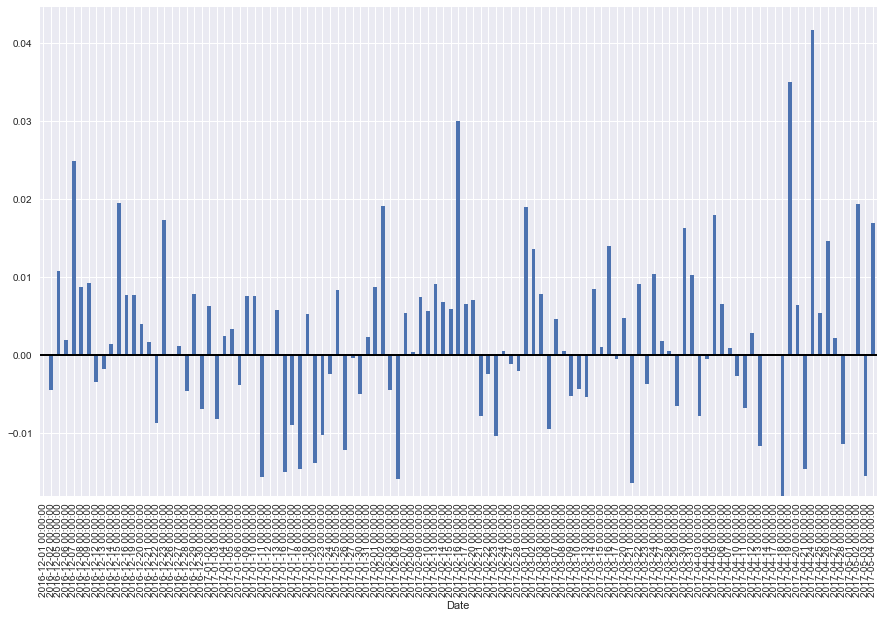

In [13]:
stock_change["Cap Gemini"].plot(grid = True, kind = "bar").axhline(y=0, color = "black", lw = 2)